# Scanpy - preprocessing of HM2D

Load gene expression matrix, sgRNA assignment (and STICR assignment) and perform initial QC, filering and cell type annotation

In [1]:
import os, sys
os.environ['R_HOME'] = sys.exec_prefix+"/lib/R/"
import pertpy as pt

In [2]:
import muon as mu
import pandas as pd
import scanpy as sc
sc.settings.figdir='figures/2D/'
sc.settings.file_format_figs='pdf'

In [3]:
import muon as mu
import pandas as pd
import scanpy as sc
sc.settings.figdir='figures/2D/'
sc.settings.file_format_figs='svg'

## Preprocessing

### GEX loading, assignning metadata

#### Initial Screen (2D)

In [37]:
import scanpy as sc
import pandas as pd
import os
fileList=['2D_L2','2D_L3','2D_L4']
adatas=[]
directory='/wynton/group/pollen/jding/brainchromatin/HM2D/Cellbender/'
cellranger_dir='/wynton/group/pollen/jding/brainchromatin/HM2D/cellranger-7.2.0/'
vireo_dir='/wynton/group/pollen/jding/brainchromatin/HM2D/vireo/'
sgRNA_dir = '/wynton/group/pollen/jding/brainchromatin/HM2D/cellbouncer/guides'

f = fileList[0]
adata = sc.read_10x_h5(os.path.join(directory,f,'cellbended_filtered.h5'))
#adata = sc.read_10x_h5(os.path.join(directory,f,'outs','filtered_feature_bc_matrix.h5'))
adata.obs['batch_name']=f
#Add individual demux
df= pd.read_csv(os.path.join(vireo_dir,f,'donor_ids.tsv'),sep='\t',index_col=0)
df['individual'] = ['GW16#172-F' if id == 'donor0' else 'GW18#140-M' if id == 'donor1' 
                    else 'GW16#130-F' if id == 'donor2' else id for id in df['donor_id']]
adata.obs['individual'] = df['individual']
#Add guide assignment
df= pd.read_csv(os.path.join(sgRNA_dir,f+'.assignments'),sep='\t',index_col=0,header=None)
df.columns = ["sgRNA_NKS", "num_guide_IDs",'log']
df.index =[x+'-1' for x in df.index]
for x in df.columns:
    adata.obs[x] = df[x] 
print (adata.obs.head())
adata.obs_names_make_unique()
adata.var_names_make_unique()
adatas.append(adata)

f = fileList[1]
adata = sc.read_10x_h5(os.path.join(directory,f,'cellbended_filtered.h5'))
#adata = sc.read_10x_h5(os.path.join(directory,f,'outs','filtered_feature_bc_matrix.h5'))
adata.obs['batch_name']=f
#Add individual demux
df= pd.read_csv(os.path.join(vireo_dir,f,'donor_ids.tsv'),sep='\t',index_col=0)
df['individual'] = ['GW16#130-F' if id == 'donor0' else 'GW18#151-F' if id == 'donor1' 
                    else 'GW18#140-M' if id == 'donor2' else id for id in df['donor_id']]
adata.obs['individual'] = df['individual']
#Add guide assignment
df= pd.read_csv(os.path.join(sgRNA_dir,f+'.assignments'),sep='\t',index_col=0,header=None)
df.columns = ["sgRNA_NKS", "num_guide_IDs",'log']
df.index =[x+'-1' for x in df.index]
for x in df.columns:
    adata.obs[x] = df[x] 
print (adata.obs.head())
adata.obs_names_make_unique()
adata.var_names_make_unique()
adatas.append(adata)

f = fileList[2]
adata = sc.read_10x_h5(os.path.join(directory,f,'cellbended_filtered.h5'))
#adata = sc.read_10x_h5(os.path.join(directory,f,'outs','filtered_feature_bc_matrix.h5'))
adata.obs['batch_name']=f
#Add individual demux
df= pd.read_csv(os.path.join(vireo_dir,f,'donor_ids.tsv'),sep='\t',index_col=0)
df['individual'] = ['GW16#172-F' if id == 'donor0' else 'GW18#151-F' if id == 'donor1' 
                    else 'GW18#140-M' if id == 'donor2' else id for id in df['donor_id']]
adata.obs['individual'] = df['individual']
#Add guide assignment
df= pd.read_csv(os.path.join(sgRNA_dir,f+'.assignments'),sep='\t',index_col=0,header=None)
df.columns = ["sgRNA_NKS", "num_guide_IDs",'log']
df.index =[x+'-1' for x in df.index]
for x in df.columns:
    adata.obs[x] = df[x] 
print (adata.obs.head())
adata.obs_names_make_unique()
adata.var_names_make_unique()
adatas.append(adata)
adatas

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/anndata/_core/anndata.py:1908: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/anndata/_core/anndata.py:1908: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


                   batch_name  individual  \
CACACAATCCATCGTC-1      2D_L2     doublet   
GAAGGACAGTACAGAT-1      2D_L2  GW16#172-F   
TCCTCCCCACTGTCCT-1      2D_L2  GW16#172-F   
GTTATGGTCTCCGAAA-1      2D_L2     doublet   
ATGGTTGTCAAAGGAT-1      2D_L2  GW16#172-F   

                                                            sgRNA_NKS  \
CACACAATCCATCGTC-1  ASCL1_-_103351511.23-P1P2,ATF7_+_54020103.23-P...   
GAAGGACAGTACAGAT-1  ATF7_+_54019638.23-P1P2,CTCF_-_67596515.23-P1P...   
TCCTCCCCACTGTCCT-1  ASCL1_-_103351499.23-P1P2,FOS_+_75745528.23-P1...   
GTTATGGTCTCCGAAA-1  ARX_+_25033832.23-P1,ATF7_+_54019638.23-P1P2,E...   
ATGGTTGTCAAAGGAT-1  ARX_-_25033780.23-P1,JUN_+_59249679.23-P1P2,KA...   

                    num_guide_IDs         log  
CACACAATCCATCGTC-1           35.0   15.477186  
GAAGGACAGTACAGAT-1           24.0   39.178653  
TCCTCCCCACTGTCCT-1           17.0  167.205444  
GTTATGGTCTCCGAAA-1           22.0   47.476561  
ATGGTTGTCAAAGGAT-1           18.0   56.713623  


/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/anndata/_core/anndata.py:1908: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/anndata/_core/anndata.py:1908: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


                   batch_name  individual  \
TTCCTTCAGTCCCAGC-1      2D_L3     doublet   
GTTGCTCCATCTTTCA-1      2D_L3  GW18#140-M   
ACTGTCCAGACATACA-1      2D_L3     doublet   
CTCCGATCATTGGCAT-1      2D_L3  GW18#151-F   
TCTACATCAGAATTCC-1      2D_L3     doublet   

                                                            sgRNA_NKS  \
TTCCTTCAGTCCCAGC-1  CTCF_+_67596356.23-P1P2,CTCF_-_67596515.23-P1P...   
GTTGCTCCATCTTTCA-1  ARX_-_25033780.23-P1,BHLHE22_-_65492946.23-P1P...   
ACTGTCCAGACATACA-1  ATF7_+_54019638.23-P1P2,BHLHE22_-_65493007.23-...   
CTCCGATCATTGGCAT-1  ARX_+_25034044.23-P1,ATF7_+_54020103.23-P1P2,B...   
TCTACATCAGAATTCC-1  ARX_+_25034044.23-P1,ATF7_+_54019638.23-P1P2,B...   

                    num_guide_IDs        log  
TTCCTTCAGTCCCAGC-1           16.0  65.667918  
GTTGCTCCATCTTTCA-1           13.0  39.478710  
ACTGTCCAGACATACA-1           15.0  29.310051  
CTCCGATCATTGGCAT-1           19.0  14.302577  
TCTACATCAGAATTCC-1           20.0  11.934166  


/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/anndata/_core/anndata.py:1908: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/anndata/_core/anndata.py:1908: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


                   batch_name  individual  \
GGATGTTGTCTCAAGT-1      2D_L4     doublet   
ATTGGGTCATGGCCCA-1      2D_L4     doublet   
CAGCGTGCAATTCTCT-1      2D_L4  GW18#151-F   
CTCCAACCACTACCGG-1      2D_L4  GW18#151-F   
TCGCTTGAGGGTACAC-1      2D_L4  GW18#151-F   

                                                            sgRNA_NKS  \
GGATGTTGTCTCAAGT-1  ASCL1_-_103351511.23-P1P2,ATF7_+_54019638.23-P...   
ATTGGGTCATGGCCCA-1  BHLHE22_-_65492946.23-P1P2,CTCF_-_67596515.23-...   
CAGCGTGCAATTCTCT-1  ARX_-_25033780.23-P1,ASCL1_-_103351511.23-P1P2...   
CTCCAACCACTACCGG-1  ARX_+_25034044.23-P1,BHLHE22_-_65493007.23-P1P...   
TCGCTTGAGGGTACAC-1  ARX_-_25033780.23-P1,ATF7_+_54020103.23-P1P2,E...   

                    num_guide_IDs        log  
GGATGTTGTCTCAAGT-1           46.0  20.296930  
ATTGGGTCATGGCCCA-1           24.0  14.834405  
CAGCGTGCAATTCTCT-1           17.0   5.648979  
CTCCAACCACTACCGG-1           24.0  37.488583  
TCGCTTGAGGGTACAC-1           26.0  11.364114  


[AnnData object with n_obs × n_vars = 58100 × 38606
     obs: 'batch_name', 'individual', 'sgRNA_NKS', 'num_guide_IDs', 'log'
     var: 'gene_ids', 'feature_types', 'genome',
 AnnData object with n_obs × n_vars = 54311 × 38606
     obs: 'batch_name', 'individual', 'sgRNA_NKS', 'num_guide_IDs', 'log'
     var: 'gene_ids', 'feature_types', 'genome',
 AnnData object with n_obs × n_vars = 55115 × 38606
     obs: 'batch_name', 'individual', 'sgRNA_NKS', 'num_guide_IDs', 'log'
     var: 'gene_ids', 'feature_types', 'genome']

In [44]:
import anndata
adata=anndata.AnnData.concatenate(*adatas, join='outer', batch_categories=fileList) 
adata = adata[adata.obs['individual'].isin(['GW16#172-F','GW18#151-F','GW18#140-M','GW16#130-F'])]
adata

/scratch/jding/ipykernel_2228477/3349681313.py:2: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata=anndata.AnnData.concatenate(*adatas, join='outer', batch_categories=fileList)


View of AnnData object with n_obs × n_vars = 129225 × 38606
    obs: 'batch_name', 'individual', 'sgRNA_NKS', 'num_guide_IDs', 'log', 'batch'
    var: 'gene_ids', 'feature_types', 'genome'

In [47]:
adata =sc.read('/wynton/group/pollen/jding/brainchromatin/HM2D/Cellbender/D7.h5ad')

#### Targeted Screen 1 (HM2D)

In [62]:
import scanpy as sc
import pandas as pd
import os
fileList=['HM2D_L1','HM2D_L2','HM2D_L3']
adatas=[]
directory='/wynton/group/pollen/jding/brainchromatin/HM2D/Cellbender/'
cellranger_dir='/wynton/group/pollen/jding/brainchromatin/HM2D/cellranger-7.2.0/'
vireo_dir='/wynton/group/pollen/jding/brainchromatin/HM2D/vireo/'
sgRNA_dir = '/wynton/group/pollen/jding/brainchromatin/HM2D/cellbouncer/guides'

f = fileList[0]
adata = sc.read_10x_h5(os.path.join(directory,f,'cellbended_filtered.h5'))
#adata = sc.read_10x_h5(os.path.join(directory,f,'outs','filtered_feature_bc_matrix.h5'))
adata.obs['batch_name']=f
#Add species info
species = pd.read_csv(os.path.join(cellranger_dir,f,'outs','analysis/gem_classification.csv'),index_col=0)
for x in species.columns.tolist():
    adata.obs[x]=species[x]
adata.obs['species'] = ['human' if x == 'GRCh38' else 'macaque' for x in adata.obs['call']]
adata.obs['individual-Q'] = ['E80#12-M' if x == 'rheMac10' else x for x in adata.obs['call']]
#Add individual demux
df= pd.read_csv(os.path.join(vireo_dir,f,'donor_ids.tsv'),sep='\t',index_col=0)
df['individual'] = ['GW18#140-M' if id == 'donor0' else 'GW16#172-F' if id == 'donor1' 
                    else 'GW17#187-M' if id == 'donor2' else id for id in df['donor_id']]
adata.obs['individual'] = df['individual']
#Add guide assignment
df= pd.read_csv(os.path.join(sgRNA_dir,f+'.assignments'),sep='\t',index_col=0,header=None)
df.columns = ["sgRNA_NKS", "num_guide_IDs",'log']
df.index =[x+'-1' for x in df.index]
for x in df.columns:
    adata.obs[x] = df[x] 
#Add STICR assignment
df= pd.read_csv(os.path.join(cellranger_dir,f,'outs/nextclone/assignments.csv'),index_col=2)
adata.obs['clone_barcode'] = df['clone_barcode']
adata.obs['clone_barcode_criteria'] = df['clone_barcode_criteria']
print (adata.obs.head())
adata.obs_names_make_unique()
adata.var_names_make_unique()
adatas.append(adata)

f = fileList[1]
adata = sc.read_10x_h5(os.path.join(directory,f,'cellbended_filtered.h5'))
#adata = sc.read_10x_h5(os.path.join(directory,f,'outs','filtered_feature_bc_matrix.h5'))
adata.obs['batch_name']=f
#Add species info
species = pd.read_csv(os.path.join(cellranger_dir,f,'outs','analysis/gem_classification.csv'),index_col=0)
for x in species.columns.tolist():
    adata.obs[x]=species[x]
adata.obs['species'] = ['human' if x == 'GRCh38' else 'macaque' for x in adata.obs['call']]
adata.obs['individual-Q'] = ['E75#14-F' if x == 'rheMac10' else x for x in adata.obs['call']]
adata.obs['individual'] = ['E75#14-F' if x == 'rheMac10' else 'GW19#153-F' for x in adata.obs['call']]
#Add guide assignment
df= pd.read_csv(os.path.join(sgRNA_dir,f+'.assignments'),sep='\t',index_col=0,header=None)
df.columns = ["sgRNA_NKS", "num_guide_IDs",'log']
df.index =[x+'-1' for x in df.index]
for x in df.columns:
    adata.obs[x] = df[x] 
#Add STICR assignment
df= pd.read_csv(os.path.join(cellranger_dir,f,'outs/nextclone/assignments.csv'),index_col=2)
adata.obs['clone_barcode'] = df['clone_barcode']
adata.obs['clone_barcode_criteria'] = df['clone_barcode_criteria']
print (adata.obs.head())
adata.obs_names_make_unique()
adata.var_names_make_unique()
adatas.append(adata)

f = fileList[2]
adata = sc.read_10x_h5(os.path.join(directory,f,'cellbended_filtered.h5'))
#adata = sc.read_10x_h5(os.path.join(directory,f,'outs','filtered_feature_bc_matrix.h5'))
adata.obs['batch_name']=f
#Add species info
species = pd.read_csv(os.path.join(cellranger_dir,f,'outs','analysis/gem_classification.csv'),index_col=0)
for x in species.columns.tolist():
    adata.obs[x]=species[x]
adata.obs['species'] = ['human' if x == 'GRCh38' else 'macaque' for x in adata.obs['call']]
adata.obs['individual-Q'] = ['E80#19-M' if x == 'rheMac10' else x for x in adata.obs['call']]
#Add individual demux
df= pd.read_csv(os.path.join(vireo_dir,f,'donor_ids.tsv'),sep='\t',index_col=0)
df['individual'] = ['GW18#183-M' if id == 'donor0' else 'GW16#172-F' if id == 'donor1' 
                    else 'GW18#140-M' if id == 'donor2' else id for id in df['donor_id']]
adata.obs['individual'] = df['individual']
#Add guide assignment
df= pd.read_csv(os.path.join(sgRNA_dir,f+'.assignments'),sep='\t',index_col=0,header=None)
df.columns = ["sgRNA_NKS", "num_guide_IDs",'log']
df.index =[x+'-1' for x in df.index]
for x in df.columns:
    adata.obs[x] = df[x] 
#Add STICR assignment
df= pd.read_csv(os.path.join(cellranger_dir,f,'outs/nextclone/assignments.csv'),index_col=2)
adata.obs['clone_barcode'] = df['clone_barcode']
adata.obs['clone_barcode_criteria'] = df['clone_barcode_criteria']
print (adata.obs.head())
adata.obs_names_make_unique()
adata.var_names_make_unique()
adatas.append(adata)
adatas

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/anndata/_core/anndata.py:1908: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/anndata/_core/anndata.py:1908: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


                   batch_name   GRCh38  rheMac10       call  species  \
ATGACCATCCTACACC-1    HM2D_L1  50636.0   72264.0  Multiplet  macaque   
GTGGAAGGTAAGCTCT-1    HM2D_L1  48997.0   36087.0  Multiplet  macaque   
GGAATCTCACACGCCA-1    HM2D_L1  13317.0   80757.0  Multiplet  macaque   
TCCACCACATATGAAG-1    HM2D_L1  76471.0   16040.0  Multiplet  macaque   
TCATATCCAAGGTACG-1    HM2D_L1  84367.0     487.0     GRCh38    human   

                   individual-Q  individual  \
ATGACCATCCTACACC-1    Multiplet         NaN   
GTGGAAGGTAAGCTCT-1    Multiplet         NaN   
GGAATCTCACACGCCA-1    Multiplet         NaN   
TCCACCACATATGAAG-1    Multiplet         NaN   
TCATATCCAAGGTACG-1       GRCh38  GW18#140-M   

                                                            sgRNA_NKS  \
ATGACCATCCTACACC-1                                                 WT   
GTGGAAGGTAAGCTCT-1  ARX_+_25033832.23-P1,ARX_-_25033780.23-P1,CTCF...   
GGAATCTCACACGCCA-1                                               

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/anndata/_core/anndata.py:1908: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/anndata/_core/anndata.py:1908: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


                   batch_name   GRCh38  rheMac10       call  species  \
TCAGCAATCTAGCCAA-1    HM2D_L2    633.0  121185.0   rheMac10  macaque   
GTACAGTGTAGACTGG-1    HM2D_L2    469.0   85909.0   rheMac10  macaque   
GTTGTGATCAAGAATG-1    HM2D_L2    581.0   84830.0   rheMac10  macaque   
GCCATTCCAACATACC-1    HM2D_L2  15042.0   61538.0  Multiplet  macaque   
TATTGCTTCTATCGCC-1    HM2D_L2  15060.0   67282.0  Multiplet  macaque   

                   individual-Q  individual  \
TCAGCAATCTAGCCAA-1     E75#14-F    E75#14-F   
GTACAGTGTAGACTGG-1     E75#14-F    E75#14-F   
GTTGTGATCAAGAATG-1     E75#14-F    E75#14-F   
GCCATTCCAACATACC-1    Multiplet  GW19#153-F   
TATTGCTTCTATCGCC-1    Multiplet  GW19#153-F   

                                                            sgRNA_NKS  \
TCAGCAATCTAGCCAA-1                                                 WT   
GTACAGTGTAGACTGG-1                         NEUROD2_-_37764165.23-P1P2   
GTTGTGATCAAGAATG-1                                               

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/anndata/_core/anndata.py:1908: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/anndata/_core/anndata.py:1908: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


                   batch_name   GRCh38  rheMac10       call  species  \
CAACCAAAGTCACACT-1    HM2D_L3  71389.0     539.0     GRCh38    human   
CTCACTGGTTTACGAC-1    HM2D_L3  68083.0     396.0     GRCh38    human   
ATCACGATCCACACAA-1    HM2D_L3  58887.0    8413.0  Multiplet  macaque   
GATGTTGCAATTCACG-1    HM2D_L3  64424.0     443.0     GRCh38    human   
GAGATGGGTACCACGC-1    HM2D_L3  62058.0     405.0     GRCh38    human   

                   individual-Q  individual  \
CAACCAAAGTCACACT-1       GRCh38  GW18#140-M   
CTCACTGGTTTACGAC-1       GRCh38     doublet   
ATCACGATCCACACAA-1    Multiplet         NaN   
GATGTTGCAATTCACG-1       GRCh38     doublet   
GAGATGGGTACCACGC-1       GRCh38  GW18#140-M   

                                                            sgRNA_NKS  \
CAACCAAAGTCACACT-1  EMX1_+_73144641.23-P1,EMX1_-_73144708.23-P1,PH...   
CTCACTGGTTTACGAC-1                                                 WT   
ATCACGATCCACACAA-1  BHLHE22_-_65493007.23-P1P2,SOX2_-_181430206.2

[AnnData object with n_obs × n_vars = 23222 × 79909
     obs: 'batch_name', 'GRCh38', 'rheMac10', 'call', 'species', 'individual-Q', 'individual', 'sgRNA_NKS', 'num_guide_IDs', 'log', 'clone_barcode', 'clone_barcode_criteria'
     var: 'gene_ids', 'feature_types', 'genome',
 AnnData object with n_obs × n_vars = 14871 × 79909
     obs: 'batch_name', 'GRCh38', 'rheMac10', 'call', 'species', 'individual-Q', 'individual', 'sgRNA_NKS', 'num_guide_IDs', 'log', 'clone_barcode', 'clone_barcode_criteria'
     var: 'gene_ids', 'feature_types', 'genome',
 AnnData object with n_obs × n_vars = 37946 × 79909
     obs: 'batch_name', 'GRCh38', 'rheMac10', 'call', 'species', 'individual-Q', 'individual', 'sgRNA_NKS', 'num_guide_IDs', 'log', 'clone_barcode', 'clone_barcode_criteria'
     var: 'gene_ids', 'feature_types', 'genome']

In [63]:
import anndata
adata=anndata.AnnData.concatenate(*adatas, join='outer', batch_categories=fileList) 
dic1 = dict(map(lambda i,j : (i,j) , adata.obs.index, adata.obs['individual']))
dic2 = dict(map(lambda i,j : (i,j) , adata.obs.index, adata.obs['individual-Q']))
adata.obs['individual'] = [dic2[x] if dic2[x] != 'GRCh38' else dic1[x] for x in adata.obs.index]
adata = adata[adata.obs['individual'] != 'Multiplet']

hdata = adata[adata.obs['species'] == 'human']
hdata._inplace_subset_var(hdata.var['genome'] == 'GRCh38')
hdata.var_names = [x[9:] for x in hdata.var_names]
hdata.var_names_make_unique()
hdata.obs_names_make_unique()
print(hdata)
qdata = adata[adata.obs['species'] == 'macaque']
qdata._inplace_subset_var(qdata.var['genome'] == 'rheMac10')
qdata.var_names = [x[9:] for x in qdata.var_names]
qdata.var_names_make_unique()
qdata.obs_names_make_unique()
print(qdata)

/scratch/jding/ipykernel_2228477/902044834.py:2: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata=anndata.AnnData.concatenate(*adatas, join='outer', batch_categories=fileList)


AnnData object with n_obs × n_vars = 29675 × 38606
    obs: 'batch_name', 'GRCh38', 'rheMac10', 'call', 'species', 'individual-Q', 'individual', 'sgRNA_NKS', 'num_guide_IDs', 'log', 'clone_barcode', 'clone_barcode_criteria', 'batch'
    var: 'gene_ids', 'feature_types', 'genome'
AnnData object with n_obs × n_vars = 42173 × 41303
    obs: 'batch_name', 'GRCh38', 'rheMac10', 'call', 'species', 'individual-Q', 'individual', 'sgRNA_NKS', 'num_guide_IDs', 'log', 'clone_barcode', 'clone_barcode_criteria', 'batch'
    var: 'gene_ids', 'feature_types', 'genome'


In [49]:
qdata = qdata[qdata.obs['individual-Q'].isin(['E75#14-F','E80#12-M','E80#19-M'])]

In [50]:
#subset hdata to remove D0
hdata = hdata[hdata.obs['individual'].isin(['GW17#187-M','GW19#153-F','GW18#183-M'])]
hdata.obs['individual'].value_counts()

GW17#187-M    3006
GW19#153-F    2187
GW18#183-M    1042
Name: individual, dtype: int64

In [51]:
import anndata
adata = anndata.AnnData.concatenate(qdata,hdata,batch_key='species_batch')
print(adata)

/scratch/jding/ipykernel_2228477/64050613.py:2: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata = anndata.AnnData.concatenate(qdata,hdata,batch_key='species_batch')


AnnData object with n_obs × n_vars = 46965 × 34507
    obs: 'batch_name', 'GRCh38', 'rheMac10', 'call', 'species', 'individual-Q', 'individual', 'sgRNA_NKS', 'num_guide_IDs', 'log', 'clone_barcode', 'clone_barcode_criteria', 'batch', 'species_batch'
    var: 'feature_types', 'gene_ids-0', 'genome-0', 'gene_ids-1', 'genome-1'


In [39]:
adata.write('/wynton/group/pollen/jding/brainchromatin/HM2D/Cellbender/HM2D.h5ad')

In [64]:
#subset hdata to keep D0
adata = hdata[hdata.obs['individual'].isin(['GW16#172-F','GW18#140-M'])]

In [27]:
adata.write('/wynton/group/pollen/jding/brainchromatin/HM2D/Cellbender/HD0.h5ad')

#### Targeted Screen 2 (HM2D_2nd)

In [74]:
import scanpy as sc
import pandas as pd
import os
fileList=['HM2D_2nd_L1','HM2D_2nd_L2']
adatas=[]
directory='/wynton/group/pollen/jding/brainchromatin/HM2D/Cellbender/'
cellranger_dir='/wynton/group/pollen/jding/brainchromatin/HM2D/cellranger-7.2.0/'
vireo_dir='/wynton/group/pollen/jding/brainchromatin/HM2D/vireo/'
sgRNA_dir = '/wynton/group/pollen/jding/brainchromatin/HM2D/cellbouncer/guides/'

f = fileList[0]
adata = sc.read_10x_h5(os.path.join(directory,f,'cellbended_filtered.h5'))
#adata = sc.read_10x_h5(os.path.join(directory,f,'outs','filtered_feature_bc_matrix.h5'))
adata.obs['batch_name']=f
adata.obs['species'] = 'human'
#Add individual demux
df= pd.read_csv(os.path.join(vireo_dir,f,'donor_ids.tsv'),sep='\t',index_col=0)
df['individual'] = ['GW17#136-F' if id == 'donor0' else 'GW19#153-F' if id == 'donor1' 
                    else 'GW22#147-M' if id == 'donor2' else 'GW18#183-M' if id == 'donor3' 
                    else id for id in df['donor_id']]
adata.obs['individual'] = df['individual']
#Add guide assignment
df= pd.read_csv(os.path.join(sgRNA_dir,f+'.assignments'),sep='\t',index_col=0,header=None)
df.columns = ["sgRNA_NKS", "num_guide_IDs",'log']
df.index =[x+'-1' for x in df.index]
for x in df.columns:
    adata.obs[x] = df[x] 
#Add STICR assignment
df= pd.read_csv(os.path.join(cellranger_dir,f,'outs/nextclone/assignments.csv'),index_col=2)
adata.obs['clone_barcode'] = df['clone_barcode']
adata.obs['clone_barcode_criteria'] = df['clone_barcode_criteria']
print (adata.obs.head())
adata.obs_names_make_unique()
adata.var_names_make_unique()
adatas.append(adata)

f = fileList[1]
adata = sc.read_10x_h5(os.path.join(directory,f,'cellbended_filtered.h5'))
#adata = sc.read_10x_h5(os.path.join(directory,f,'outs','filtered_feature_bc_matrix.h5'))
adata.obs['batch_name']=f
adata.obs['species'] = 'human'
#Add individual demux
df= pd.read_csv(os.path.join(vireo_dir,f,'donor_ids.tsv'),sep='\t',index_col=0)
df['individual'] = ['GW22#147-M' if id == 'donor0' else 'GW18#183-M' if id == 'donor1' 
                    else 'GW17#136-F' if id == 'donor2' else 'GW19#153-F' if id == 'donor3' 
                    else id for id in df['donor_id']]
adata.obs['individual'] = df['individual']
#Add guide assignment
df= pd.read_csv(os.path.join(sgRNA_dir,f+'.assignments'),sep='\t',index_col=0,header=None)
df.columns = ["sgRNA_NKS", "num_guide_IDs",'log']
df.index =[x+'-1' for x in df.index]
for x in df.columns:
    adata.obs[x] = df[x] 
#Add STICR assignment
df= pd.read_csv(os.path.join(cellranger_dir,f,'outs/nextclone/assignments.csv'),index_col=2)
adata.obs['clone_barcode'] = df['clone_barcode']
adata.obs['clone_barcode_criteria'] = df['clone_barcode_criteria']
print (adata.obs.head())
adata.obs_names_make_unique()
adata.var_names_make_unique()
adatas.append(adata)
adatas

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/anndata/_core/anndata.py:1908: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/anndata/_core/anndata.py:1908: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


                     batch_name species individual sgRNA_NKS  num_guide_IDs  \
ACCCTTGTCACAACCA-1  HM2D_2nd_L1   human    doublet        WT            0.0   
TAACTTCTCCTTCGAC-1  HM2D_2nd_L1   human    doublet        WT            0.0   
CTCCATGCATGGAAGC-1  HM2D_2nd_L1   human    doublet        WT            0.0   
GAGGGTATCATCACCC-1  HM2D_2nd_L1   human    doublet        WT            0.0   
GAAACCTAGCCAACCC-1  HM2D_2nd_L1   human    doublet        WT            0.0   

                    log                                      clone_barcode  \
ACCCTTGTCACAACCA-1  0.0  CCCACTAAATGTGCGCGGATCGCCATCGTCATTCGAGCTAGGAGGA...   
TAACTTCTCCTTCGAC-1  0.0  CCGTCCGCGACATTTTGGATCCGGAGCGTGAGGCAAGCTAGGGCAG...   
CTCCATGCATGGAAGC-1  0.0  CCCGCTCTGGTGCCTCGGATCTCTGCAGAAGCCCGGGCTAGTCCTC...   
GAGGGTATCATCACCC-1  0.0  CGCGACCAATATCCACGGATCTCCAGCGAGCACGTAGCTAGAGGTA...   
GAAACCTAGCCAACCC-1  0.0  CCTCAAGGCCAGACGGGGATCGGCGTCTGTACTTGAGCTAGGCTCT...   

                      clone_barcode_criteria  
ACCCTTGTC

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/anndata/_core/anndata.py:1908: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/anndata/_core/anndata.py:1908: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


                     batch_name species  individual  \
TGATTCTTCGGCTCTT-1  HM2D_2nd_L2   human     doublet   
ATCGCCTGTCCCACGA-1  HM2D_2nd_L2   human     doublet   
CACTAAGCAGCACCCA-1  HM2D_2nd_L2   human  GW18#183-M   
GCACTAAAGCGTACAG-1  HM2D_2nd_L2   human     doublet   
TCCTTCTGTCACTACA-1  HM2D_2nd_L2   human     doublet   

                                                            sgRNA_NKS  \
TGATTCTTCGGCTCTT-1  ARX_+_25034044.23-P1,ARX_-_25033780.23-P1,NEUR...   
ATCGCCTGTCCCACGA-1                                                 WT   
CACTAAGCAGCACCCA-1  ARX_+_25034044.23-P1,ARX_-_25033780.23-P1,SOX2...   
GCACTAAAGCGTACAG-1  ARX_+_25034044.23-P1,SOX2_+_181429802.23-P1P2,...   
TCCTTCTGTCACTACA-1  ARX_+_25034044.23-P1,NR2E1_-_108487770.23-P1P2...   

                    num_guide_IDs         log  \
TGATTCTTCGGCTCTT-1           14.0  457.459664   
ATCGCCTGTCCCACGA-1            0.0    0.000000   
CACTAAGCAGCACCCA-1            5.0  718.647599   
GCACTAAAGCGTACAG-1            3.0 

[AnnData object with n_obs × n_vars = 80485 × 38606
     obs: 'batch_name', 'species', 'individual', 'sgRNA_NKS', 'num_guide_IDs', 'log', 'clone_barcode', 'clone_barcode_criteria'
     var: 'gene_ids', 'feature_types', 'genome',
 AnnData object with n_obs × n_vars = 76913 × 38606
     obs: 'batch_name', 'species', 'individual', 'sgRNA_NKS', 'num_guide_IDs', 'log', 'clone_barcode', 'clone_barcode_criteria'
     var: 'gene_ids', 'feature_types', 'genome']

In [75]:
import anndata
adata=anndata.AnnData.concatenate(*adatas, join='outer', batch_categories=fileList) 
adata = adata[adata.obs['individual'].isin(['GW22#147-M','GW18#183-M','GW17#136-F','GW19#153-F'])]
adata

/scratch/jding/ipykernel_2228477/543126190.py:2: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata=anndata.AnnData.concatenate(*adatas, join='outer', batch_categories=fileList)


View of AnnData object with n_obs × n_vars = 113910 × 38606
    obs: 'batch_name', 'species', 'individual', 'sgRNA_NKS', 'num_guide_IDs', 'log', 'clone_barcode', 'clone_barcode_criteria', 'batch'
    var: 'gene_ids', 'feature_types', 'genome'

In [46]:
adata.write('/wynton/group/pollen/jding/brainchromatin/HM2D/Cellbender/HM2D_2nd.h5ad')

### QC

In [78]:
import numpy as np
ribo_genes=[name for name in adata.var_names if name.startswith('RPS') or name.startswith('RPL') ]
adata.obs['percent_ribo'] = np.sum(
adata[:, ribo_genes].X, axis=1) / np.sum(adata.X, axis=1)
mito_genes = [name for name in adata.var_names if name in ['ND1','ND2','ND4L','ND4','ND5','ND6','ATP6','ATP8','CYTB','COX1','COX2','COX3'] or name.startswith('CHRM-') or name.startswith('MT-')]
adata.obs['percent_mito'] = np.sum(
adata[:, adata.var.index.isin(mito_genes)].X, axis=1) / np.sum(adata.X, axis=1)
print(adata)

/scratch/jding/ipykernel_2228477/782179660.py:3: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['percent_ribo'] = np.sum(


AnnData object with n_obs × n_vars = 113910 × 38606
    obs: 'batch_name', 'species', 'individual', 'sgRNA_NKS', 'num_guide_IDs', 'log', 'clone_barcode', 'clone_barcode_criteria', 'batch', 'percent_ribo', 'percent_mito'
    var: 'gene_ids', 'feature_types', 'genome'


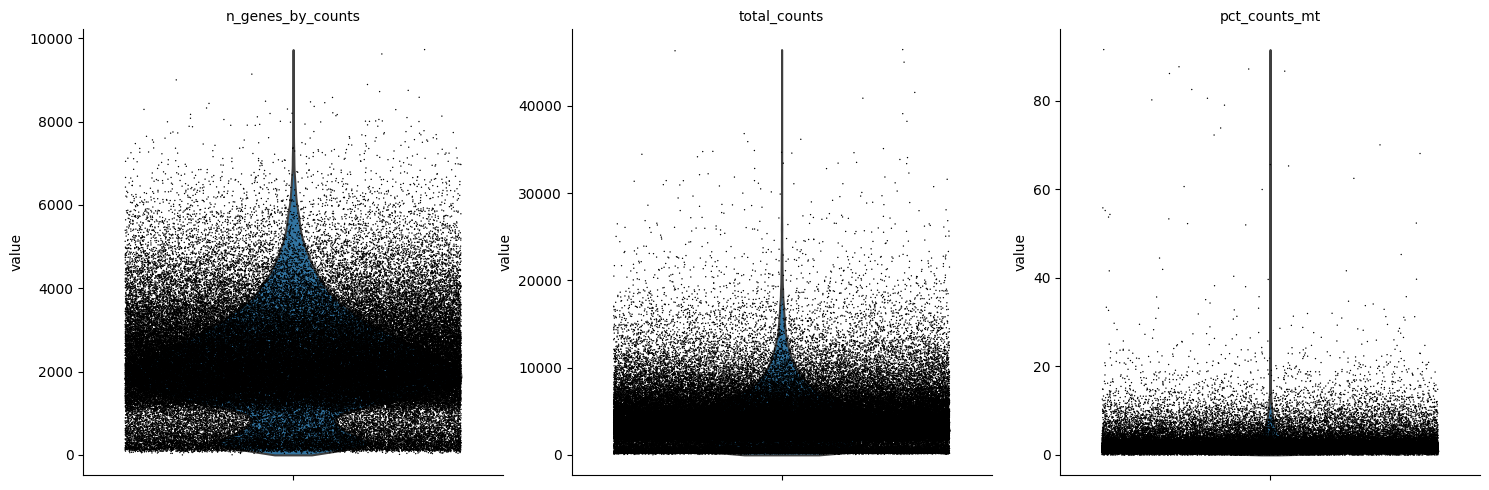

In [79]:
adata.var['mt'] = adata.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

In [80]:
adata._inplace_subset_obs(adata.obs['percent_ribo']<.4)
adata._inplace_subset_obs(adata.obs['percent_mito']<.15)
adata._inplace_subset_var(~adata.var.index.isin(mito_genes))
adata

AnnData object with n_obs × n_vars = 113370 × 38593
    obs: 'batch_name', 'species', 'individual', 'sgRNA_NKS', 'num_guide_IDs', 'log', 'clone_barcode', 'clone_barcode_criteria', 'batch', 'percent_ribo', 'percent_mito', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

In [81]:
#adata.raw = adata
#sc.pp.filter_genes(adata,min_cells=10)
sc.pp.filter_cells(adata, min_genes=1000)
adata

AnnData object with n_obs × n_vars = 98337 × 38593
    obs: 'batch_name', 'species', 'individual', 'sgRNA_NKS', 'num_guide_IDs', 'log', 'clone_barcode', 'clone_barcode_criteria', 'batch', 'percent_ribo', 'percent_mito', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

In [82]:
adata.obs['gene_NKS'] = [','.join(list(set([i.split('_')[0] for i in x.split(',')]))) for x in adata.obs['sgRNA_NKS'].astype(str)]
adata.obs['num_gene_NKS'] = [len(list(set([i.split('_')[0] for i in x.split(',')]))) for x in adata.obs['sgRNA_NKS'].astype(str)]
#adata = adata[adata.obs['num_gene_NKS'].isin([1,2])]
adata.obs['gene_NKS'] =[x.replace('non-targeting,','') for x in adata.obs['gene_NKS']] 
adata.obs['gene_NKS'] =[x.replace(',non-targeting','') for x in adata.obs['gene_NKS']] 

In [83]:
#rename guides
feature_ref = pd.read_csv('/wynton/home/pollenlab/jding/BrainChromatin/Perturb/cellranger/feature_ref.csv',index_col=0)
feature_ref['guide_name'] = feature_ref['target_gene_name'] + '_' +  feature_ref['guideID']
dic = dict(map(lambda i,j : (i,j) , feature_ref.index, feature_ref['guide_name']))
dic

{'KLF10_-_103668072.23-P1': 'KLF10_g1',
 'KLF10_-_103668064.23-P1': 'KLF10_g2',
 'KLF10_-_103667898.23-P1': 'KLF10_g3',
 'ZBTB18_ATGGGGAGCCGTTGAGAGTG': 'ZBTB18_g1',
 'ZBTB18_CCATGGCAGCAGCCCAGCGG': 'ZBTB18_g2',
 'ZBTB18_GAAGAGGGCCCCACTCTCAA': 'ZBTB18_g3',
 'NR2E1_+_108487374.23-P1P2': 'NR2E1_g1',
 'NR2E1_-_108487507.23-P1P2': 'NR2E1_g2',
 'NR2E1_-_108487770.23-P1P2': 'NR2E1_g3',
 'VEZF1_-_56065595.23-P1P2': 'VEZF1_g1',
 'VEZF1_-_56065555.23-P1P2': 'VEZF1_g2',
 'VEZF1_-_56065552.23-P1P2': 'VEZF1_g3',
 'ZNF441_+_11877881.23-P1P2': 'ZNF441_g1',
 'ZNF441_-_11878061.23-P1P2': 'ZNF441_g2',
 'ZNF441_-_11877838.23-P1P2': 'ZNF441_g3',
 'NFIA_+_61548485.23-P1P2': 'NFIA_g1',
 'NFIA_-_61548230.23-P1P2': 'NFIA_g2',
 'NFIA_-_61548500.23-P1P2': 'NFIA_g3',
 'NFIB_+_14314559.23-P1P2': 'NFIB_g1',
 'NFIB_+_14314562.23-P1P2': 'NFIB_g2',
 'NFIB_-_14314072.23-P1P2': 'NFIB_g3',
 'ZNF148_-_125093949.23-P1P2': 'ZNF148_g1',
 'ZNF148_+_125093932.23-P1P2': 'ZNF148_g2',
 'ZNF148_+_125093703.23-P1P2': 'ZNF148_g3',
 

In [84]:
adata.obs['sgRNA'] = [','.join(list(set([dic[i] if i in dic.keys() else i for i in x.split(',')]))) for x in adata.obs['sgRNA_NKS'].astype(str)]
adata.obs['num_sgRNA'] = [len(list(set(x.split(',')))) for x in adata.obs['sgRNA'].astype(str)]
adata.obs['sgRNA_effecitve'] = [','.join(list(set(i for i in x.split(',') if not 'Non-Targeting' in i))) for x in adata.obs['sgRNA'].astype(str)]

In [71]:
adata.write('/wynton/group/pollen/jding/brainchromatin/HM2D/Cellbender/HD0_guides.h5ad')

In [60]:
adata.write('/wynton/group/pollen/jding/brainchromatin/HM2D/Cellbender/HM2D_guides.h5ad')

In [85]:
adata.write('/wynton/group/pollen/jding/brainchromatin/HM2D/Cellbender/HM2D_2nd_guides.h5ad')

## Visualization (post SCVI)

In [ ]:
import scanpy as sc
import anndata
adata1 = sc.read('/wynton/group/pollen/jding/brainchromatin/HM2D/Cellbender/HD0_guides.h5ad')
adata1.obs['timepoint'] = 'D0'
adata1.obs['species']='human'
adata2 = sc.read('/wynton/group/pollen/jding/brainchromatin/HM2D/Cellbender/2D_guides.h5ad')
adata2.obs['timepoint'] = 'D7'
adata2.obs['species']='human'
adata3 = sc.read('/wynton/group/pollen/jding/brainchromatin/HM2D/Cellbender/HM2D_guides.h5ad')
adata3.obs['timepoint'] = 'D7'
adata4 = sc.read('/wynton/group/pollen/jding/brainchromatin/HM2D/Cellbender/HM2D_2nd_guides.h5ad')
adata4.obs['timepoint'] = 'D7'
adata=anndata.AnnData.concatenate(adata1,adata2,adata3,adata4, join='outer', batch_categories=['HD0','HD7','HMD7','HM2ndD7']) 

In [4]:
import pandas as pd
import os
directory='/wynton/group/pollen/jding/brainchromatin/Li/'
df = pd.read_csv(os.path.join(directory,'query_HM2Dall.X_scANVI.csv'),index_col=11)
del df['Unnamed: 0']
adata.obsm['X_scANVI'] =  df.loc[adata.obs_names, : ].values
df = pd.read_csv(os.path.join(directory,'query_HM2Dall.X_umap.csv'),index_col=3)
del df['Unnamed: 0']
adata.obsm['X_umap'] =  df.loc[adata.obs_names, : ].values

In [5]:
cell_meta = pd.read_csv(os.path.join(directory,'query_HM2Dall.obs.csv'), index_col=0).loc[adata.obs_names, : ]
for col in cell_meta.columns.difference(adata.obs.columns):
    adata.obs[col] = cell_meta[col].values

/scratch/jding/ipykernel_785492/435813562.py:1: DtypeWarning: Columns (4,6,11,12,27,28,29) have mixed types. Specify dtype option on import or set low_memory=False.
  cell_meta = pd.read_csv(os.path.join(directory,'query_HM2Dall.obs.csv'), index_col=0).loc[adata.obs_names, : ]


In [6]:
for x in adata.obs.columns.tolist():
    adata.obs[x]=adata.obs[x].astype(str)
for x in adata.var.columns.tolist():
    adata.var[x]=adata.var[x].astype(str)

In [7]:
adata.write('/wynton/group/pollen/jding/brainchromatin/Li/query_HM2Dall_guides.h5ad')

In [1]:
import scanpy as sc
adata = sc.read('/wynton/group/pollen/jding/brainchromatin/Li/query_HM2Dall_guides.h5ad')

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


In [23]:
import scanpy as sc 
#adata = sc.read('/wynton/group/pollen/jding/brainchromatin/Li/query_HM2Dall_guides.h5ad')
#filter to cells w single/double gene KD
adata = adata[adata.obs['num_gene_NKS'].isin(['1','2'])]
adata.obs['log'] = adata.obs['log'].astype(float)
adata[adata.obs['log'] > 10]
#change cell type names to remove '/'
adata.obs['supervised_name'] = adata.obs['supervised_name'].str.replace('/', '-')
#subset to different timepoints/batch
adata[adata.obs['batch']=='HD0'].write('/wynton/group/pollen/jding/brainchromatin/HM2D/D0-filtered_guides.h5ad')
adata[adata.obs['batch']=='HD7'].write('/wynton/group/pollen/jding/brainchromatin/HM2D/D7-filtered_guides.h5ad')
adata[adata.obs['batch'].isin(['HMD7','HM2ndD7'])].write('/wynton/group/pollen/jding/brainchromatin/HM2D/HM2D-filtered_guides.h5ad')

/scratch/jding/ipykernel_981405/778346931.py:5: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['log'] = adata.obs['log'].astype(float)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/anndata/_core/anndata.py:1301: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/anndata/_core/anndata.py:1301: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/anndata/_core/anndata.py:1301: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c


/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/sit

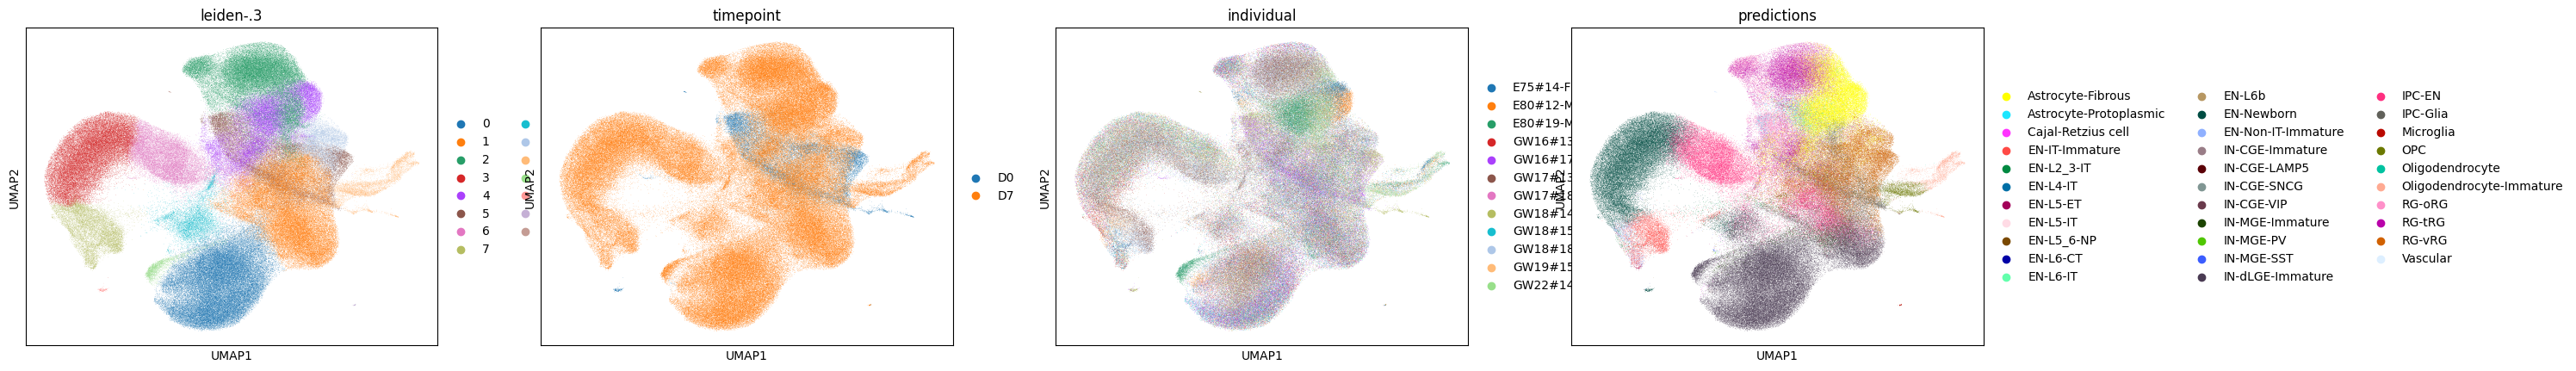

In [1]:
sc.pl.umap(adata, color=['leiden-.3','timepoint','individual','predictions'])

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


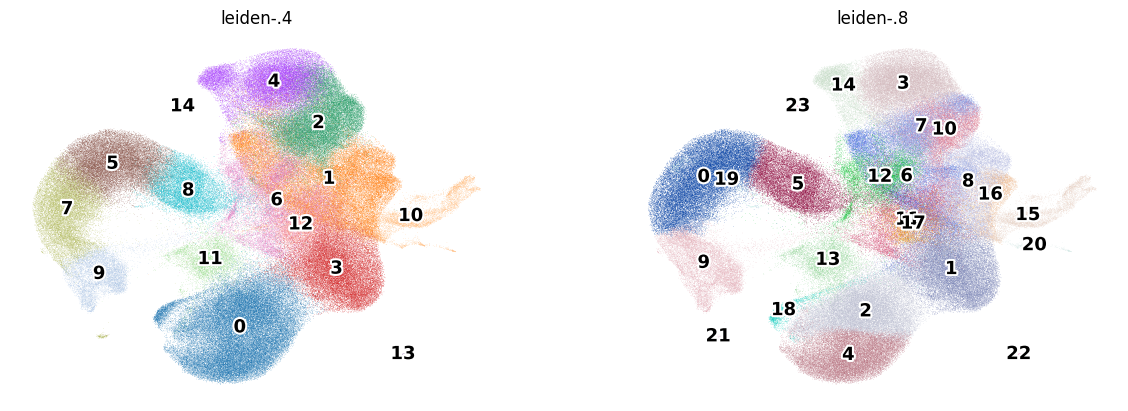

In [4]:
sc.pl.umap(adata, color=['leiden-.4','leiden-.8'], legend_loc='on data',
           frameon=False, legend_fontsize=13, legend_fontoutline=3)

In [21]:
old_to_new = {
    '0':'IN_dLGE/CGE',
    '1':'RG_DIV',
    '2':'RG/Astro',
    '3':'IPC_IN',
    '4':'RG/Astro',
    '5':'EN_ImN',
    '6':'RG_DIV',
    '7':'EN',
    '8':'IPC_EN',
    '9':'EN',
    '10':'OPC/Oligo',
    '11':'Technical',
    '12':'RG_DIV',
    '13':'MG',
    '14':'Vasc'
}
adata.obs['supervised_name'] = (
    adata.obs['leiden-.4']
    .map(old_to_new)
    .astype('category')
)

In [22]:
old_to_new = {
    '0':'Inhibitory Neurons',
    '1':'Radial Glia',
    '2':'Radial Glia',
    '3':'Inhibitory Neurons',
    '4':'Radial Glia',
    '5':'Excitatory Neurons',
    '6':'Radial Glia',
    '7':'Excitatory Neurons',
    '8':'Excitatory Neurons',
    '9':'Excitatory Neurons',
    '10':'Glia',
    '11':'Technical',
    '12':'Radial Glia',
    '13':'Microglia',
    '14':'Vascular'
}
adata.obs['class'] = (
    adata.obs['leiden-.4']
    .map(old_to_new)
    .astype('category')
)

In [34]:
adata[adata.obs['batch']=='HD0'].write('/wynton/group/pollen/jding/brainchromatin/HM2D/D0.h5ad')
adata[adata.obs['batch']=='HD7'].write('/wynton/group/pollen/jding/brainchromatin/HM2D/D7.h5ad')
adata[adata.obs['batch'].isin(['HMD7','HM2ndD7'])].write('/wynton/group/pollen/jding/brainchromatin/HM2D/HM2D.h5ad')

In [23]:
adata[adata.obs['batch']=='HMD7'].obs

batch_name  GRCh38 rheMac10      call  \
TACACCCCATCTCATT-1-HM2D_L1-0-HMD7    HM2D_L1   710.0  82284.0  rheMac10   
AGTCAACGTGGTAACG-1-HM2D_L1-0-HMD7    HM2D_L1   697.0  75361.0  rheMac10   
CCACGAGTCTGCATGA-1-HM2D_L1-0-HMD7    HM2D_L1   611.0  56769.0  rheMac10   
ATTCCATCACACACTA-1-HM2D_L1-0-HMD7    HM2D_L1   717.0  63007.0  rheMac10   
AGGGAGTTCCAGCACG-1-HM2D_L1-0-HMD7    HM2D_L1   674.0  62685.0  rheMac10   
...                                      ...     ...      ...       ...   
CCCATTGCACTGGATT-1-HM2D_L3-1-HMD7    HM2D_L3  2669.0     57.0    GRCh38   
ACTGTGAAGGCTTCCG-1-HM2D_L3-1-HMD7    HM2D_L3  2705.0     32.0    GRCh38   
GTCAAACGTAGGTACG-1-HM2D_L3-1-HMD7    HM2D_L3  2689.0     29.0    GRCh38   
TGATGCACATCCTAAG-1-HM2D_L3-1-HMD7    HM2D_L3  2511.0     31.0    GRCh38   
TCTCCGACAACAAAGT-1-HM2D_L3-1-HMD7    HM2D_L3  2451.0     56.0    GRCh38   

                                   species individual-Q  individual  \
TACACCCCATCTCATT-1-HM2D_L1-0-HMD7  macaque     E80#12-M    E80#12-M   
AGTCAACGTGGTAACG-1-HM2D_L1-0-HMD7  macaque     E80#12-M    E80#12-M   
CCACGAGTCTGCATGA-1-HM2D_L1-0-HMD7  macaque     E80#12-M    E80#12-M   
ATTCCATCACACACTA-1-HM2D_L1-0-HMD7  macaque     E80#12-M    E80#12-M   
AGGGAGTTCCAGCACG-1-HM2D_L1-0-HMD7  macaque     E80#12-M    E80#12-M   
...                                    ...          ...         ...   
CCCATTGCACTGGATT-1-HM2D_L3-1-HMD7    human       GRCh38  GW18#183-M   
ACTGTGAAGGCTTCCG-1-HM2D_L3-1-HMD7    human       GRCh38  GW18#183-M   
GTCAAACGTAGGTACG-1-HM2D_L3-1-HMD7    human       GRCh38  GW18#183-M   
TGATGCACATCCTAAG-1-HM2D_L3-1-HMD7    human       GRCh38  GW18#183-M   
TCTCCGACAACAAAGT-1-HM2D_L3-1-HMD7    human       GRCh38  GW18#183-M   

                                                                           sgRNA_NKS  \
TACACCCCATCTCATT-1-HM2D_L1-0-HMD7                          ZNF219_-_21566780.23-P1P2   
AGTCAACGTGGTAACG-1-HM2D_L1-0-HMD7  ARX_-_25033780.23-P1,NR2E1_+_108487374.23-P1P2...   
CCACGAGTCTGCATGA-1-HM2D_L1-0-HMD7  NEUROD2_-_37763998.23-P1P2,NEUROD2_-_37764165....   
ATTCCATCACACACTA-1-HM2D_L1-0-HMD7         SOX2_-_181430206.23-P1P2,non-targeting_TDF   
AGGGAGTTCCAGCACG-1-HM2D_L1-0-HMD7  ARX_+_25034044.23-P1,ARX_-_25033780.23-P1,NEUR...   
...                                                                              ...   
CCCATTGCACTGGATT-1-HM2D_L3-1-HMD7                                                 WT   
ACTGTGAAGGCTTCCG-1-HM2D_L3-1-HMD7                                                 WT   
GTCAAACGTAGGTACG-1-HM2D_L3-1-HMD7                                                 WT   
TGATGCACATCCTAAG-1-HM2D_L3-1-HMD7                                                 WT   
TCTCCGACAACAAAGT-1-HM2D_L3-1-HMD7                                                 WT   

                                  num_guide_IDs         log  ... leiden-.2  \
TACACCCCATCTCATT-1-HM2D_L1-0-HMD7           1.0   81.116902  ...         6   
AGTCAACGTGGTAACG-1-HM2D_L1-0-HMD7           3.0  130.467218  ...         2   
CCACGAGTCTGCATGA-1-HM2D_L1-0-HMD7           7.0  624.666192  ...         0   
ATTCCATCACACACTA-1-HM2D_L1-0-HMD7           2.0  206.491892  ...         0   
AGGGAGTTCCAGCACG-1-HM2D_L1-0-HMD7          11.0  234.714835  ...         2   
...                                         ...         ...  ...       ...   
CCCATTGCACTGGATT-1-HM2D_L3-1-HMD7           0.0         0.0  ...         8   
ACTGTGAAGGCTTCCG-1-HM2D_L3-1-HMD7           0.0         0.0  ...         8   
GTCAAACGTAGGTACG-1-HM2D_L3-1-HMD7           0.0         0.0  ...         8   
TGATGCACATCCTAAG-1-HM2D_L3-1-HMD7           0.0         0.0  ...         8   
TCTCCGACAACAAAGT-1-HM2D_L3-1-HMD7           0.0         0.0  ...         0   

                                  leiden-.3 leiden-.8        predictions  \
TACACCCCATCTCATT-1-HM2D_L1-0-HMD7         8        13     EN-IT-Immature   
AGTCAACGTGGTAACG-1-HM2D_L1-0-HMD7         8        12  Astrocyte-Fibrous   
CCACGAGTCTGCATGA-1-HM2D_L1-0-HMD7         1         8  Ast

In [1]:
#subset data for figure1
#241118 most updated
import scanpy as sc 
adata = sc.read('/wynton/group/pollen/jding/brainchromatin/Li/query_HM2Dall_guides.h5ad')
adata = adata[adata.obs['individual'].isin(['GW18#140-M','GW16#172-F','GW18#151-F','GW16#130-F'])]

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


In [1]:
#subset data for FigS7
#241118 most updated
import scanpy as sc 
adata = sc.read('/wynton/group/pollen/jding/brainchromatin/Li/query_HM2Dall_guides.h5ad')
adata = adata[adata.obs['batch'].isin(['HMD7','HM2ndD7'])]

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


In [80]:
adata.obs['sex'] = [x.split('-')[-1] for x in adata.obs['individual']]
adata.obs['stage'] = [x.split('#')[0] for x in adata.obs['individual']]
adata.obs['perturbation'] = ['NT' if x in ['WT','non-targeting'] else 'Perturbed' for x in adata.obs['gene_NKS']]

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


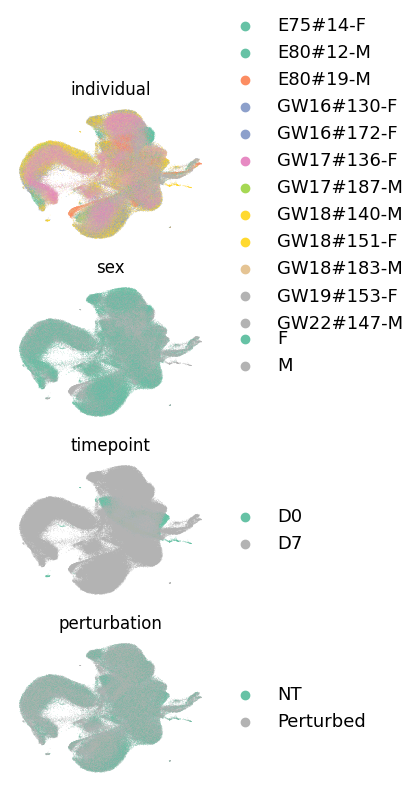

In [6]:
# Inital setting for plot size
from matplotlib import rcParams
rcParams["figure.figsize"] = (2, 2)
sc.pl.umap(adata, color=['individual','sex','timepoint','perturbation'],frameon=False, legend_fontsize=13, legend_fontoutline=3,palette='Set2',ncols=1)

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/anndata/_core/anndata.py:1301: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/anndata/_core/anndata.py:1301: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/anndata/_core/anndata.py:1301: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/anndata/_core/anndata.py:1301: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/anndata/_core/an

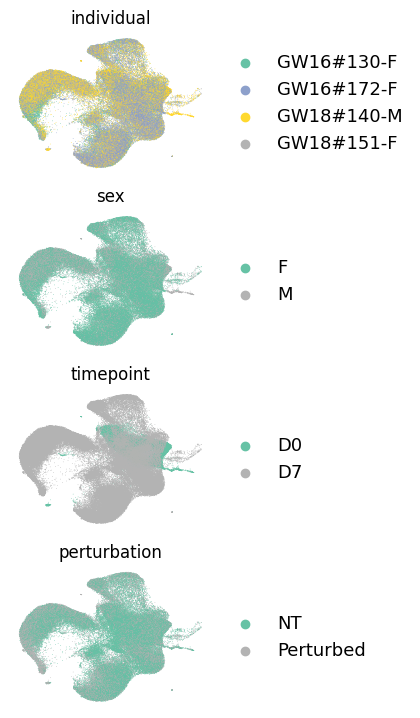

In [9]:
# Inital setting for plot size
from matplotlib import rcParams
rcParams["figure.figsize"] = (2, 2)
sub = adata[adata.obs['batch'].isin(['HD0','HD7'])]
sc.pl.umap(sub, color=['individual','sex','timepoint','perturbation'],frameon=False, legend_fontsize=13, legend_fontoutline=3,palette='Set2',ncols=1)

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/anndata/_core/anndata.py:1301: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/anndata/_core/anndata.py:1301: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/anndata/_core/anndata.py:1301: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/anndata/_core/anndata.py:1301: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/anndata/_core/an

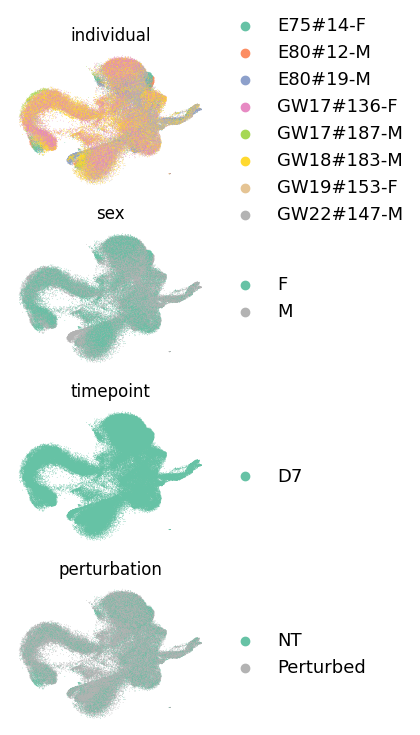

In [10]:
# Inital setting for plot size
from matplotlib import rcParams
rcParams["figure.figsize"] = (2, 2)
sub = adata[adata.obs['batch'].isin(['HMD7','HM2ndD7'])]
sc.pl.umap(sub, color=['individual','sex','timepoint','perturbation'],frameon=False, legend_fontsize=13, legend_fontoutline=3,palette='Set2',ncols=1)

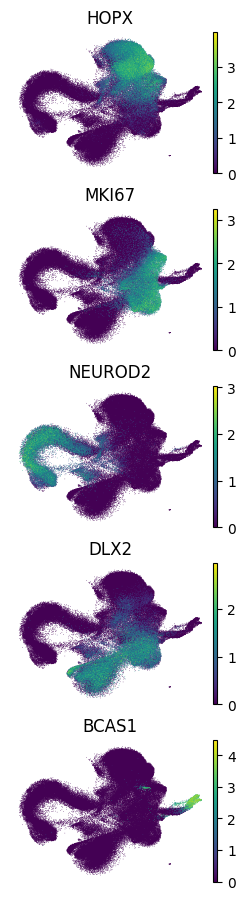

In [9]:
# Inital setting for plot size
from matplotlib import rcParams
rcParams["figure.figsize"] = (2, 2)
sc.pl.umap(adata, color=['HOPX','MKI67','NEUROD2','DLX2','BCAS1'],use_raw=False,frameon=False, legend_fontsize=13, legend_fontoutline=3,ncols=1,save='5genes-HM2D')

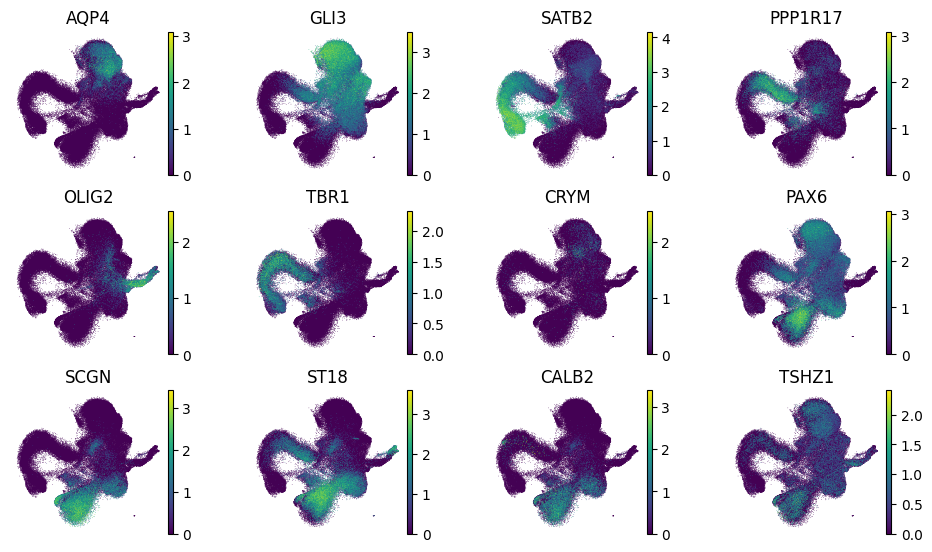

In [8]:
sc.pl.umap(adata, color=['AQP4','GLI3','SATB2','PPP1R17','OLIG2','TBR1','CRYM','PAX6','SCGN','ST18','CALB2','TSHZ1'],use_raw=False,
           frameon=False, legend_fontsize=13, legend_fontoutline=3,ncols=4 ,save='12genes-HM2D')

## Comparison with in vivo atlas (Wang et al 2025)

Pearson correlation of in vivo and in vitro defined cell types:

In [3]:
import random 
directory='/wynton/group/pollen/jding/brainchromatin/Li/'
adata_ref = sc.read(os.path.join(directory,'ref.h5ad'), compression='gzip')
adata_ref=adata_ref[np.random.choice(adata_ref.obs.index,10000,replace=False),:]

In [26]:
#load query data and normalize
adata_query = sc.read(os.path.join(directory,'query_HM2Dall_guides.h5ad'), compression='gzip')
adata_query = adata_query[adata_query.obs['gene_NKS'] == 'non-targeting']
adata_query = adata_query[adata_query.obs['batch'] == 'HD7']
adata_query.raw = adata_query.copy()

In [27]:
#calculate cell type markers 
sc.pp.normalize_total(adata_query, target_sum=1e4,exclude_highly_expressed=True)
sc.pp.log1p(adata_query)
sc.tl.rank_genes_groups(adata_query, groupby='supervised_name', 
                        method='wilcoxon',
                        key_added='wilcoxon',n_genes=25)
adata_query.X = adata_query.raw.X

In [29]:
var = [x for x in list(np.concatenate(adata_query.uns['wilcoxon']['names'].tolist())) if x in adata_ref.var_names]
adata_ref = adata_ref[:, var].copy()
adata_query = adata_query[:, var].copy()

In [30]:
adata_query.var_names_make_unique()
adata_ref.var_names_make_unique()

In [31]:
sc.pp.normalize_total(adata_query, target_sum=1e4,exclude_highly_expressed=True)
sc.pp.log1p(adata_query)

In [32]:
adata_ref.obs['cluster'] = adata_ref.obs['type'] 
adata_query.obs['cluster'] = adata_query.obs['supervised_name'] 
adata = anndata.AnnData.concatenate(adata_query,adata_ref,join='outer',batch_categories=['This Study','In Vivo Atlas']) 

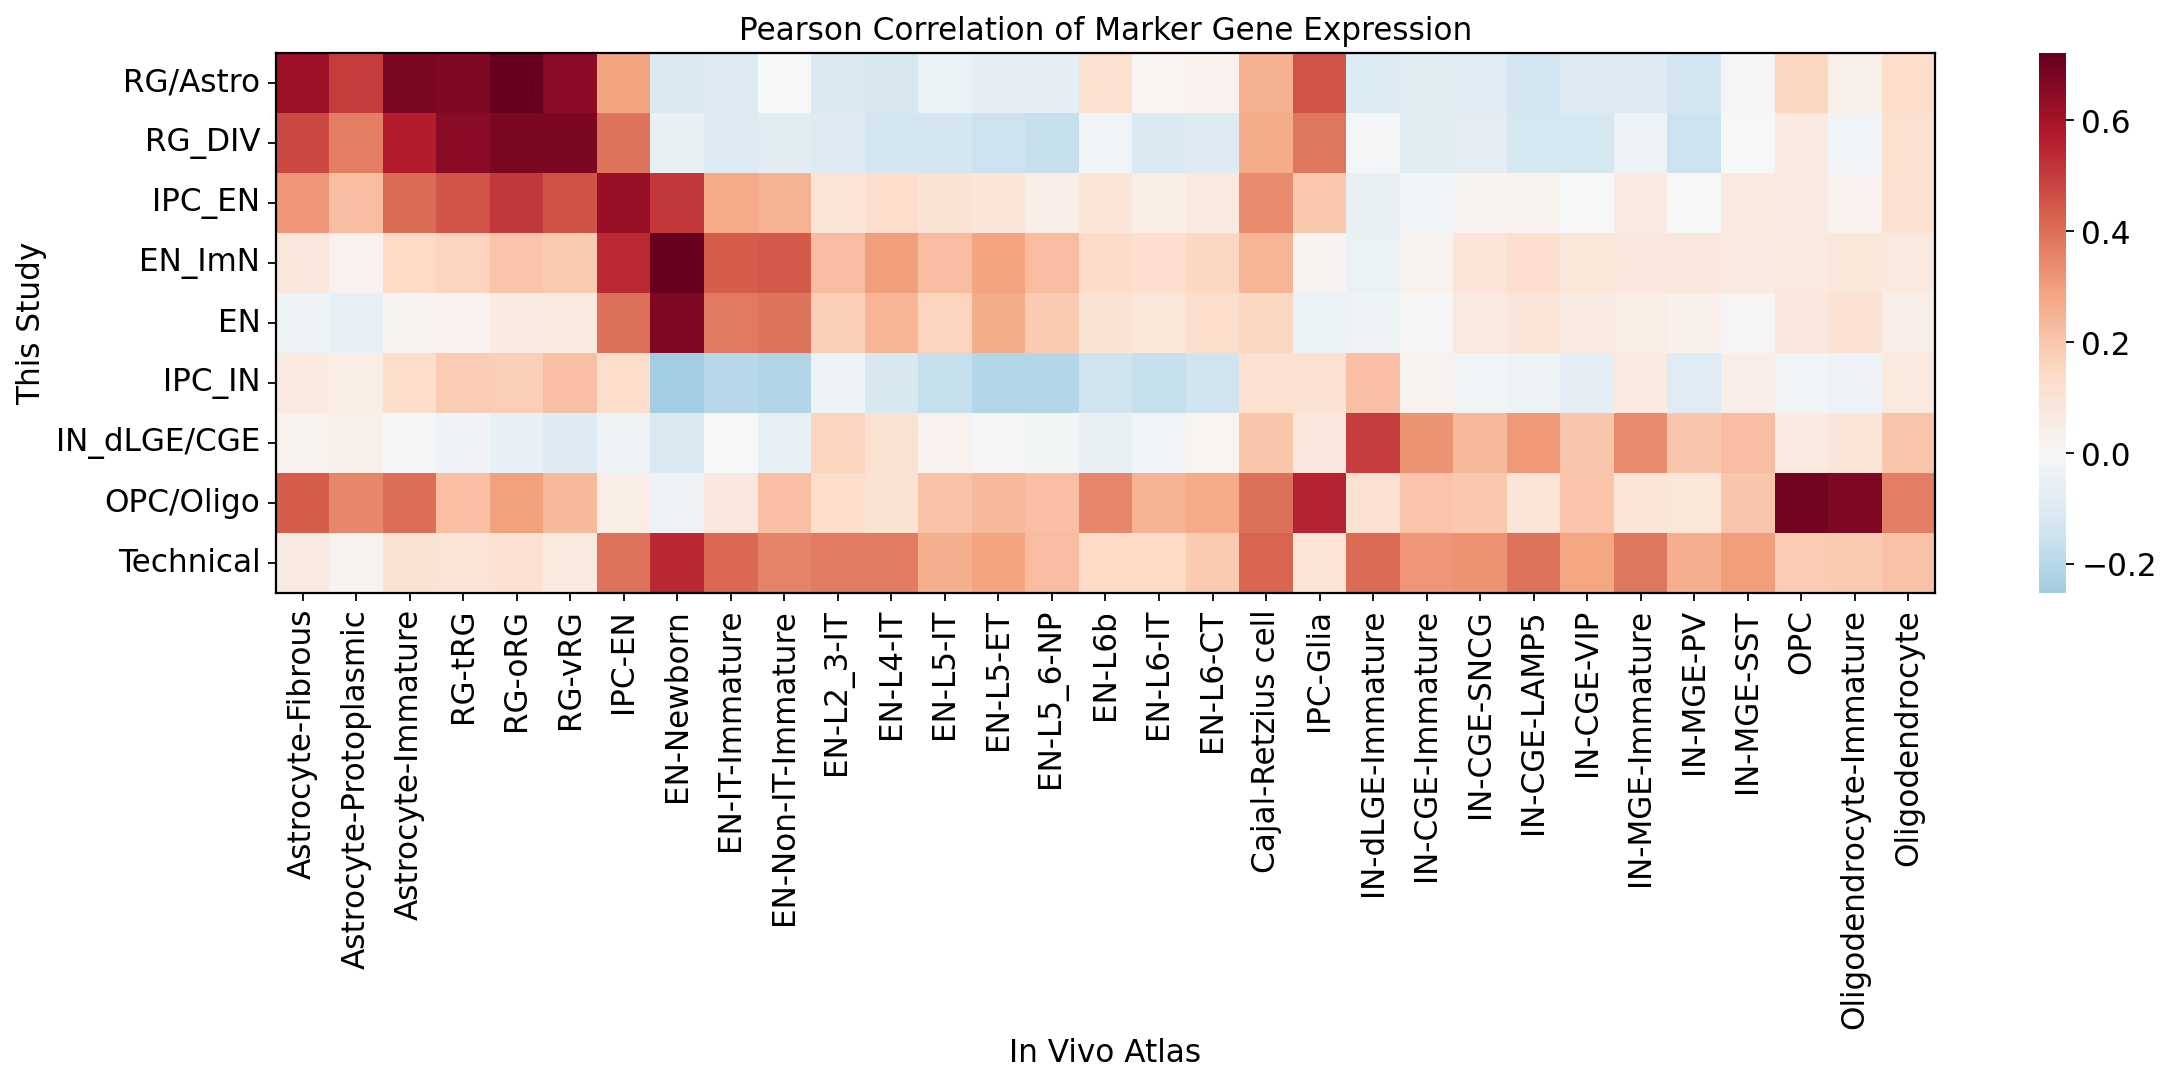

In [17]:
import scanpy as sc
import pandas as pd
import numpy as np

cluster_key = 'cluster'

# Compute mean expression per cluster
cluster_means = adata.to_df().groupby(adata.obs[cluster_key]).mean()

# Compute correlation matrix
correlation_matrix = cluster_means.T.corr(method='pearson')  # Use 'spearman' for Spearman correlation
correlation_matrix = correlation_matrix.loc[['RG/Astro','RG_DIV','IPC_EN','EN_ImN','EN', 'IPC_IN','IN_dLGE/CGE','OPC/Oligo','Technical'],:]
correlation_matrix = correlation_matrix.loc[:,['Astrocyte-Fibrous','Astrocyte-Protoplasmic','Astrocyte-Immature','RG-tRG','RG-oRG','RG-vRG','IPC-EN',
 'EN-Newborn','EN-IT-Immature', 'EN-Non-IT-Immature','EN-L2_3-IT','EN-L4-IT','EN-L5-IT','EN-L5-ET','EN-L5_6-NP','EN-L6b','EN-L6-IT','EN-L6-CT','Cajal-Retzius cell',
 'IPC-Glia','IN-dLGE-Immature','IN-CGE-Immature','IN-CGE-SNCG','IN-CGE-LAMP5','IN-CGE-VIP','IN-MGE-Immature','IN-MGE-PV','IN-MGE-SST',
 'OPC','Oligodendrocyte-Immature','Oligodendrocyte']]


import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 7))
ax = sns.heatmap(correlation_matrix, cmap="RdBu_r",center=0,annot=False)
ax.set_yticks(np.arange(0.5, len(correlation_matrix.index), 1)) 
ax.set_xticks(np.arange(0.5, len(correlation_matrix.columns), 1)) 

# Drawing the frame 
for _, spine in ax.spines.items(): 
    spine.set_visible(True) 
    spine.set_linewidth(1) 

# Set x and y labels
plt.xlabel("In Vivo Atlas")
plt.ylabel("This Study")
plt.title("Pearson Correlation of Marker Gene Expression")
plt.tight_layout()
plt.savefig('./figures/GEX_correlation_top25.pdf')
plt.show()

results of reference mapping:

In [37]:
#load query data 
adata_query = sc.read(os.path.join(directory,'query_HM2Dall_guides.h5ad'), compression='gzip')
adata_query = adata_query[adata_query.obs['batch'] == 'HD7']

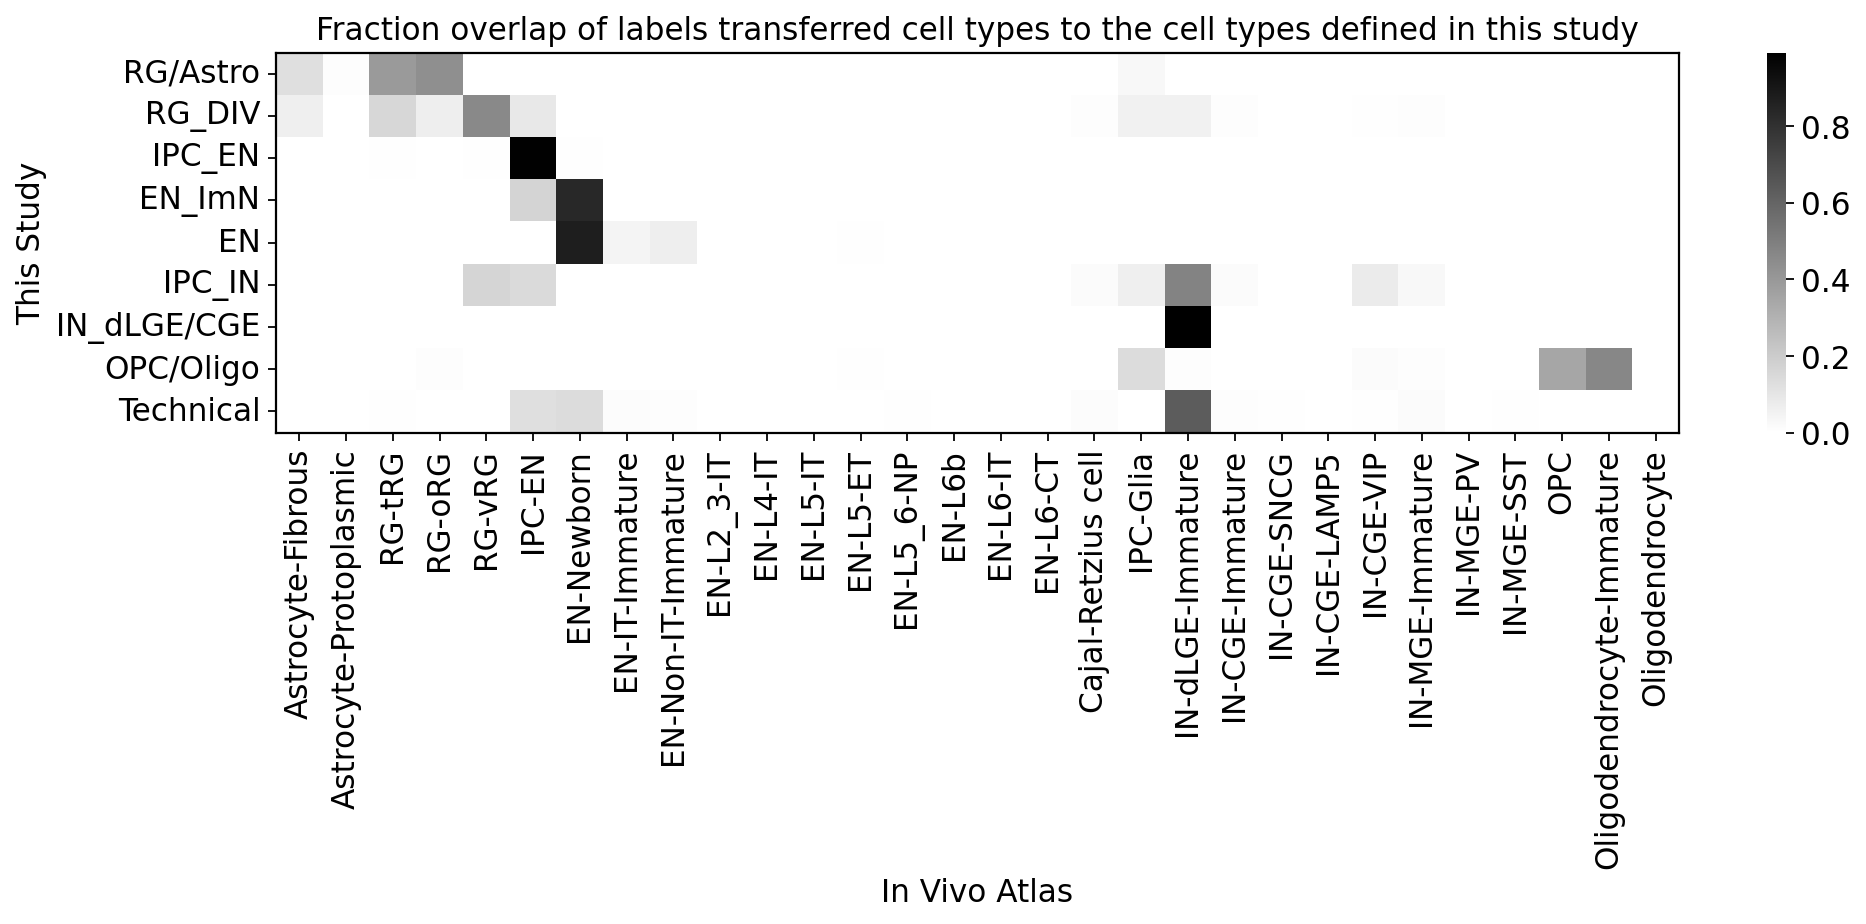

In [56]:
df = (
    adata_query.obs.groupby(['predictions',"supervised_name"])
    .size()
    .unstack(fill_value=0)
)


norm_df = df / df.sum(axis=0)

norm_df = norm_df.loc[:,['RG/Astro','RG_DIV','IPC_EN','EN_ImN','EN', 'IPC_IN','IN_dLGE/CGE','OPC/Oligo','Technical']]
norm_df = norm_df.loc[['Astrocyte-Fibrous','Astrocyte-Protoplasmic','RG-tRG','RG-oRG','RG-vRG','IPC-EN',
 'EN-Newborn','EN-IT-Immature', 'EN-Non-IT-Immature','EN-L2_3-IT','EN-L4-IT','EN-L5-IT','EN-L5-ET','EN-L5_6-NP','EN-L6b','EN-L6-IT','EN-L6-CT','Cajal-Retzius cell',
 'IPC-Glia','IN-dLGE-Immature','IN-CGE-Immature','IN-CGE-SNCG','IN-CGE-LAMP5','IN-CGE-VIP','IN-MGE-Immature','IN-MGE-PV','IN-MGE-SST',
 'OPC','Oligodendrocyte-Immature','Oligodendrocyte'],:]


# Optional: Visualize as a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(13, 6))
ax = sns.heatmap(norm_df.T, cmap="gray_r",annot=False)
ax.set_yticks(np.arange(0.5, len(norm_df.T.index), 1)) 
ax.set_xticks(np.arange(0.5, len(norm_df.T.columns), 1)) 

# Drawing the frame 
for _, spine in ax.spines.items(): 
    spine.set_visible(True) 
    spine.set_linewidth(1) 

# Set x and y labels
plt.xlabel("In Vivo Atlas")
plt.ylabel("This Study")
plt.title("Fraction overlap of labels transferred cell types to the cell types defined in this study")
plt.tight_layout()
plt.savefig('./figures/SCVI.gray.pdf')
plt.show()

## Subset IN lineage

In [13]:
#subset data for 2D IN lineage
import scanpy as sc 
adata = sc.read('/wynton/scratch/jding/brainchromatin/HM2D/D7-filtered_guides.h5ad')
adata = adata[adata.obs['supervised_name'].isin(['IN_dLGE-CGE'])]
adata.raw = adata.copy()
sc.pp.normalize_total(adata,exclude_highly_expressed=True)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.pp.scale(adata,max_value=10)
sc.pp.pca(adata,n_comps=100)
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)
sc.tl.umap(adata)

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


In [63]:
#subset data for 2D IN lineage
import scanpy as sc 
adata = sc.read('/wynton/group/pollen/jding/brainchromatin/Li/query_HM2Dall_guides.h5ad')
adata = adata[adata.obs['supervised_name'].isin(['IN_dLGE/CGE'])]
adata.raw = adata.copy()
sc.pp.normalize_total(adata,exclude_highly_expressed=True)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.pp.scale(adata,max_value=10)
sc.pp.pca(adata,n_comps=100)
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)
sc.tl.umap(adata)

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


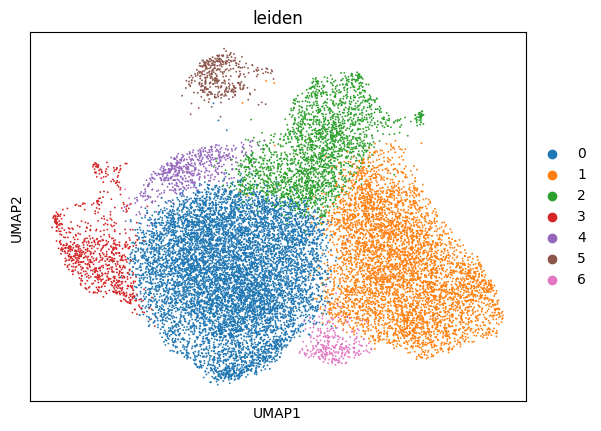

In [17]:
sc.tl.leiden(adata, resolution = 0.2)
sc.pl.umap(adata, color='leiden')

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


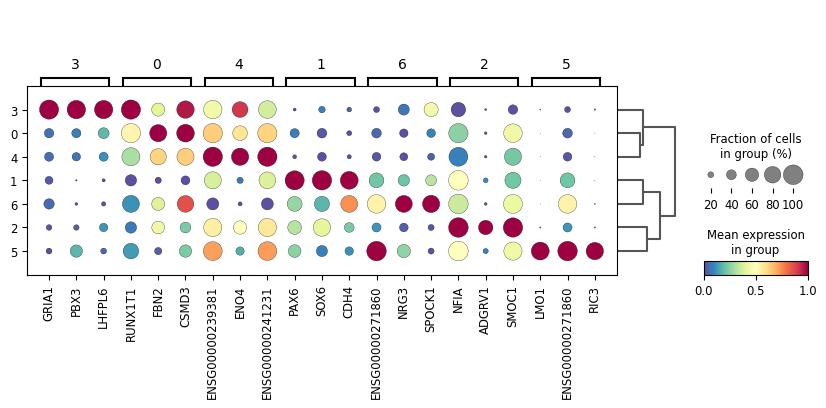

In [26]:
sc.tl.rank_genes_groups(adata, groupby='leiden', 
                        method='wilcoxon',
                        key_added='wilcoxon',n_genes=50)
sc.pl.rank_genes_groups_dotplot(adata,groupby='leiden',
                                cmap='Spectral_r',
                                 standard_scale='var',
                                       n_genes=3,key='wilcoxon',save='INmarkers')

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


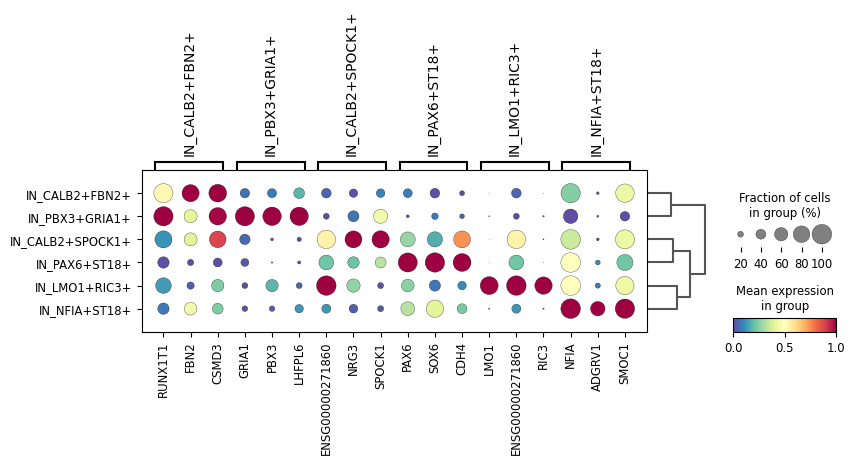

In [48]:
sc.tl.rank_genes_groups(adata, groupby='subtype', 
                        method='wilcoxon',
                        key_added='wilcoxon',n_genes=50)

sc.pl.rank_genes_groups_dotplot(adata,groupby='subtype',
                                cmap='Spectral_r',
                                 standard_scale='var',
                                       n_genes=3,key='wilcoxon',save='INmarkers')

In [49]:
old_to_new = {
    '0':'IN_CALB2/FBN2',
    '1':'IN_PAX6/ST18',
    '2':'IN_NFIA/ST18',
    '3':'IN_PBX3/GRIA1',
    '4':'IN_CALB2/FBN2',
    '5':'IN_LMO1/RIC3',
    '6':'IN_CALB2/SPOCK1'
}
adata.obs['subtype'] = (
    adata.obs['leiden']
    .map(old_to_new)
    .astype('category')
)

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


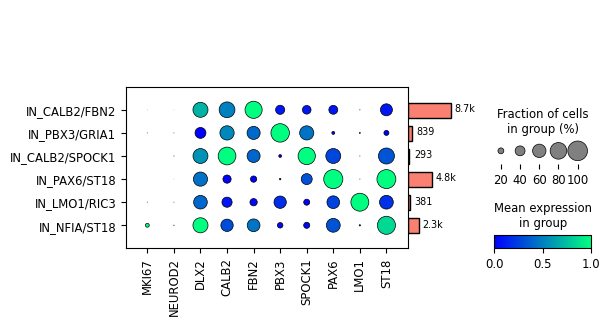

In [50]:
sc.tl.dendrogram(adata, 'subtype')
dp = sc.pl.dotplot(adata, ['MKI67','NEUROD2','DLX2','CALB2','FBN2','PBX3','SPOCK1','PAX6','LMO1','ST18'], 
                   'subtype', dendrogram=True, cmap='Reds' ,#cmap='Spectral_r',,
                                 standard_scale='var',dot_max=0.6, return_fig=True)
dp.add_totals().style(dot_edge_color='black', dot_edge_lw=0.5).show()

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


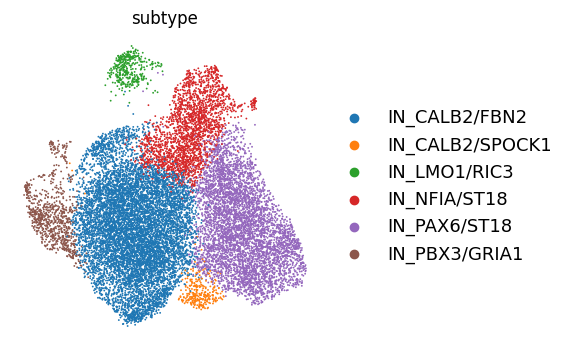

In [69]:
sc.settings.file_format_figs='pdf'
rcParams["figure.figsize"] = (4, 4)
sc.pl.umap(adata, color='subtype',frameon=False, legend_fontsize=13, legend_fontoutline=3,save = 'subtype')

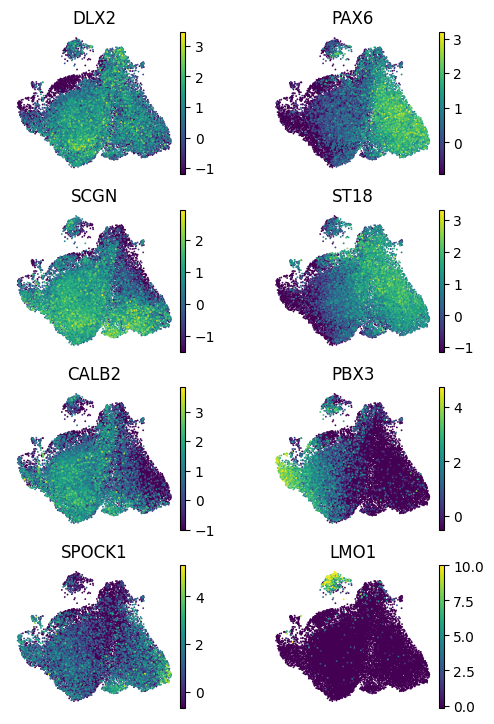

In [37]:
from matplotlib import rcParams
rcParams["figure.figsize"] = (2, 2)
sc.pl.umap(adata, color=['DLX2','PAX6','SCGN','ST18','CALB2','PBX3','SPOCK1','LMO1'],use_raw=False,
           frameon=False, legend_fontsize=13, legend_fontoutline=3,ncols=2 ,save = 'IN_8genes')

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


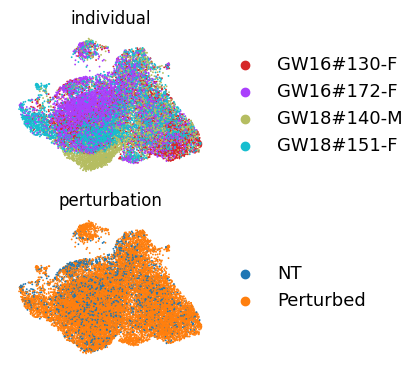

In [58]:
from matplotlib import rcParams
rcParams["figure.figsize"] = (2, 2)
sc.pl.umap(adata, color=['individual','perturbation'],
           frameon=False, legend_fontsize=13, legend_fontoutline=3,ncols=1 ,save = 'IN_distritbution')

In [54]:
adata.raw.to_adata().write('/wynton/scratch/jding/brainchromatin/HM2D/D7-filtered_guides.IN.h5ad')

In [68]:
adata = sc.read('/wynton/scratch/jding/brainchromatin/HM2D/D7-filtered_guides.IN.h5ad')

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


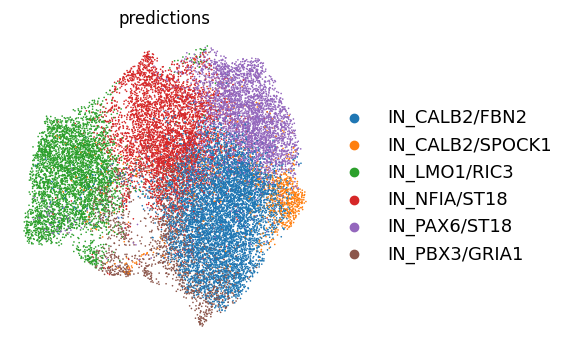

In [78]:
import numpy as np
from matplotlib import rcParams
sc.settings.file_format_figs='pdf'
rcParams["figure.figsize"] = (4, 4)
adata =  sc.read('/wynton/scratch/jding/brainchromatin/Li/HM2D_IN_query.h5ad')
adata.uns['predictions_colors'] = np.array(["#1F77B4FF", "#FF7F0EFF", "#2CA02CFF", "#D62728FF", "#9467BDFF", "#8C564BFF"], dtype=object)
sc.pl.umap(adata, color='predictions',frameon=False, legend_fontsize=13, legend_fontoutline=3,
           save = 'subtype_HM2D')

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


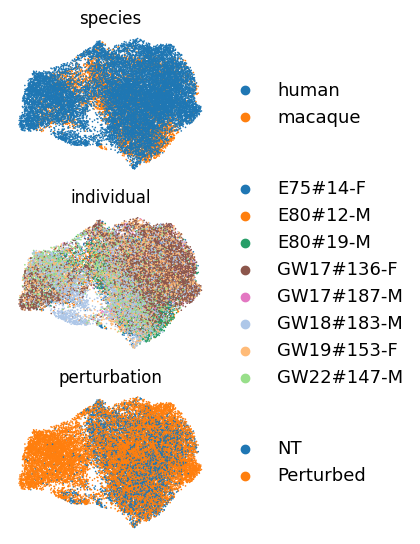

In [81]:
from matplotlib import rcParams
rcParams["figure.figsize"] = (2, 2)
sc.pl.umap(adata, color=['species','individual','perturbation'],
           frameon=False, legend_fontsize=13, legend_fontoutline=3,ncols=1 ,save = 'IN_distritbution_HM2D')